In [1]:
import os
import glob
import numpy as np
import scipy.sparse as sp
from libra_py import units, data_stat, influence_spectrum
import matplotlib.pyplot as plt
from liblibra_core import *
from libra_py.workflows.nbra import step3
import libra_py.packages.cp2k.methods as CP2K_methods

/projects/academic/cyberwksp21/SOFTWARE/Conda/envs/libra2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/cyberwksp21/SOFTWARE/Conda/envs/libra2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/cyberwksp21/SOFTWARE/Conda/envs/libra2/lib/python3.7/importlib/_bootstrap.py:219: Runtime

<IPython.core.display.Javascript object>


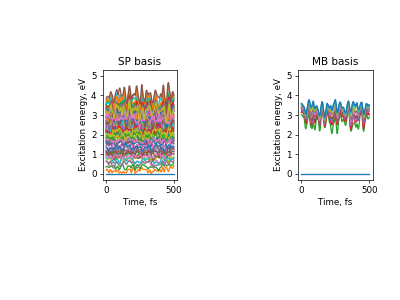

In [5]:
%matplotlib notebook
params = {"path_to_energy_files": "res-mb-sd-DFT", "dt": 1.0, 
          "prefix": "Hvib_sd_", "suffix": "_re", "istep": 0, "fstep": 499}

titles = ['SP basis', 'MB basis']
plt.figure()
for c, basis in enumerate(['sd','ci']):
    plt.subplot(1,2,c+1)
    params.update({"prefix": F"Hvib_{basis}_"})
    md_time, energies = CP2K_methods.extract_energies_sparse(params)
    energies = energies * units.au2ev
    for i in range(energies.shape[1]):
        plt.plot(md_time, energies[:,i]-energies[:,0])
    
    plt.title(titles[c])
    plt.ylabel('Excitation energy, eV')
    plt.xlabel('Time, fs')
    plt.ylim(-0.3, 5.3)
    plt.savefig('exci_mdpbe0.jpg',dpi=600)
plt.tight_layout()
